# College Student Placement Dataset - Data Analysis

## 1. Import Libraries

Importing the libraries that we need for data analysis and visualization.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


## 2. Load Data

Loading the dataset and displaying the first few rows to see how exactly the data is structured.


In [23]:
df = pd.read_csv('college_student_placement_dataset.csv')

print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\nFirst 5 rows of the dataset:")
df.head()


Dataset Shape: 10,000 rows × 10 columns

First 5 rows of the dataset:


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


## 3. Distribution Plots

Visualizing how our numerical features are distributed. Helps us to understand the spread and shape of our data, showing where most values cluster.


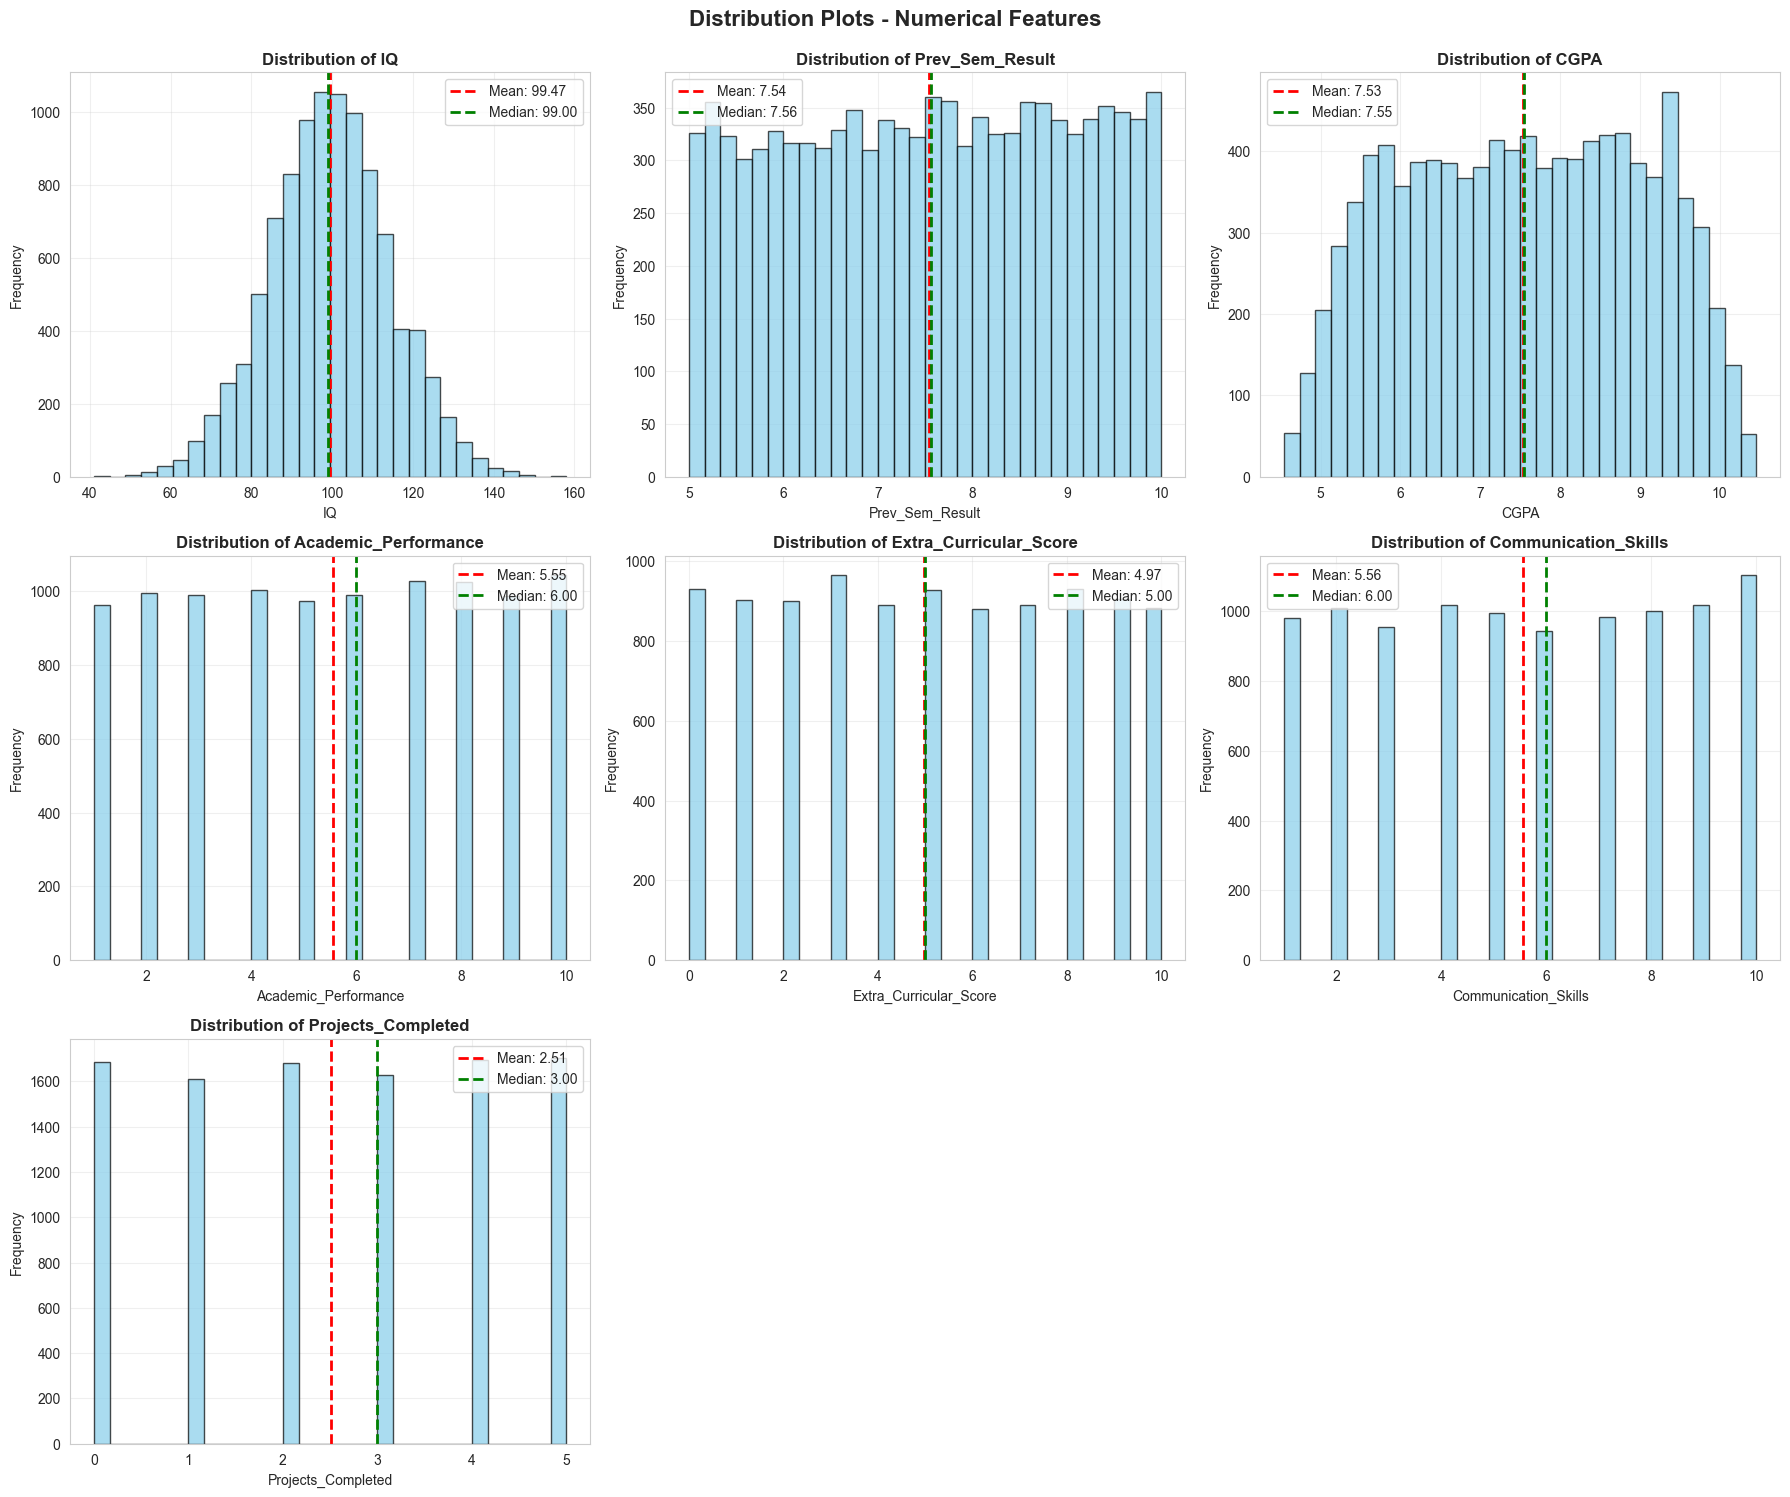

In [24]:
numerical_columns = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 
                     'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']

figure, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for index, column in enumerate(numerical_columns):
    axes[index].hist(df[column], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[index].axvline(df[column].mean(), color='red', linestyle='--', linewidth=2, 
                        label=f'Mean: {df[column].mean():.2f}')
    axes[index].axvline(df[column].median(), color='green', linestyle='--', linewidth=2, 
                        label=f'Median: {df[column].median():.2f}')
    axes[index].set_title(f'Distribution of {column}', fontsize=12, fontweight='bold')
    axes[index].set_xlabel(column, fontsize=10)
    axes[index].set_ylabel('Frequency', fontsize=10)
    axes[index].legend()
    axes[index].grid(True, alpha=0.3)

axes[7].axis('off')
axes[8].axis('off')

plt.suptitle('Distribution Plots - Numerical Features', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


## 4. Correlation Heatmap

This heatmap shows which features move together and which ones are independent of each other.


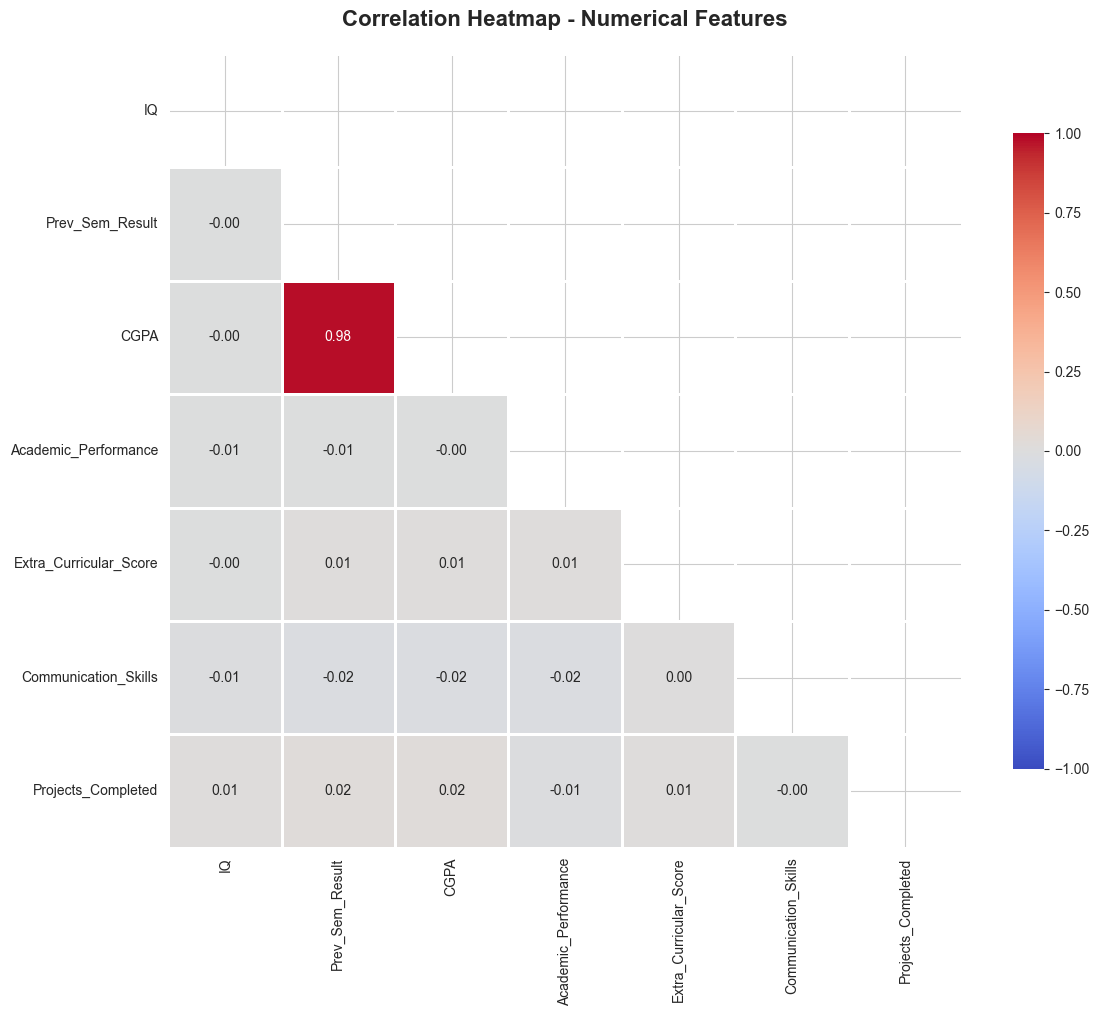

In [25]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
upper_triangle_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8},
            mask=upper_triangle_mask,
            vmin=-1, 
            vmax=1)

plt.title('Correlation Heatmap - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## 5. Statistical Summary

Getting the key numbers that summarize our data - averages, spread, and quartiles. These statistics give us a quick overview of each feature's characteristics.


In [26]:
print("=" * 80)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("=" * 80)
summary = df[numerical_columns].describe()
print(summary)

print("\n" + "=" * 80)
print("ADDITIONAL STATISTICS")
print("=" * 80)
statistics = pd.DataFrame({
    'Mean': df[numerical_columns].mean(),
    'Median': df[numerical_columns].median(),
    'Standard Deviation': df[numerical_columns].std(),
    'First Quartile (25%)': df[numerical_columns].quantile(0.25),
    'Second Quartile (50%)': df[numerical_columns].quantile(0.50),
    'Third Quartile (75%)': df[numerical_columns].quantile(0.75),
    'Minimum': df[numerical_columns].min(),
    'Maximum': df[numerical_columns].max()
})
print(statistics.round(2))


STATISTICAL SUMMARY - NUMERICAL FEATURES
                 IQ  Prev_Sem_Result          CGPA  Academic_Performance  \
count  10000.000000     10000.000000  10000.000000          10000.000000   
mean      99.471800         7.535673      7.532379              5.546400   
std       15.053101         1.447519      1.470141              2.873477   
min       41.000000         5.000000      4.540000              1.000000   
25%       89.000000         6.290000      6.290000              3.000000   
50%       99.000000         7.560000      7.550000              6.000000   
75%      110.000000         8.790000      8.770000              8.000000   
max      158.000000        10.000000     10.460000             10.000000   

       Extra_Curricular_Score  Communication_Skills  Projects_Completed  
count            10000.000000          10000.000000        10000.000000  
mean                 4.970900              5.561800            2.513400  
std                  3.160103              2.900866 

## 6. Box Plots - Features by Placement Status

Comparing features between placed and not placed students using box plots. These show the median, quartiles, and outliers, making it easy to spot differences between the two groups.


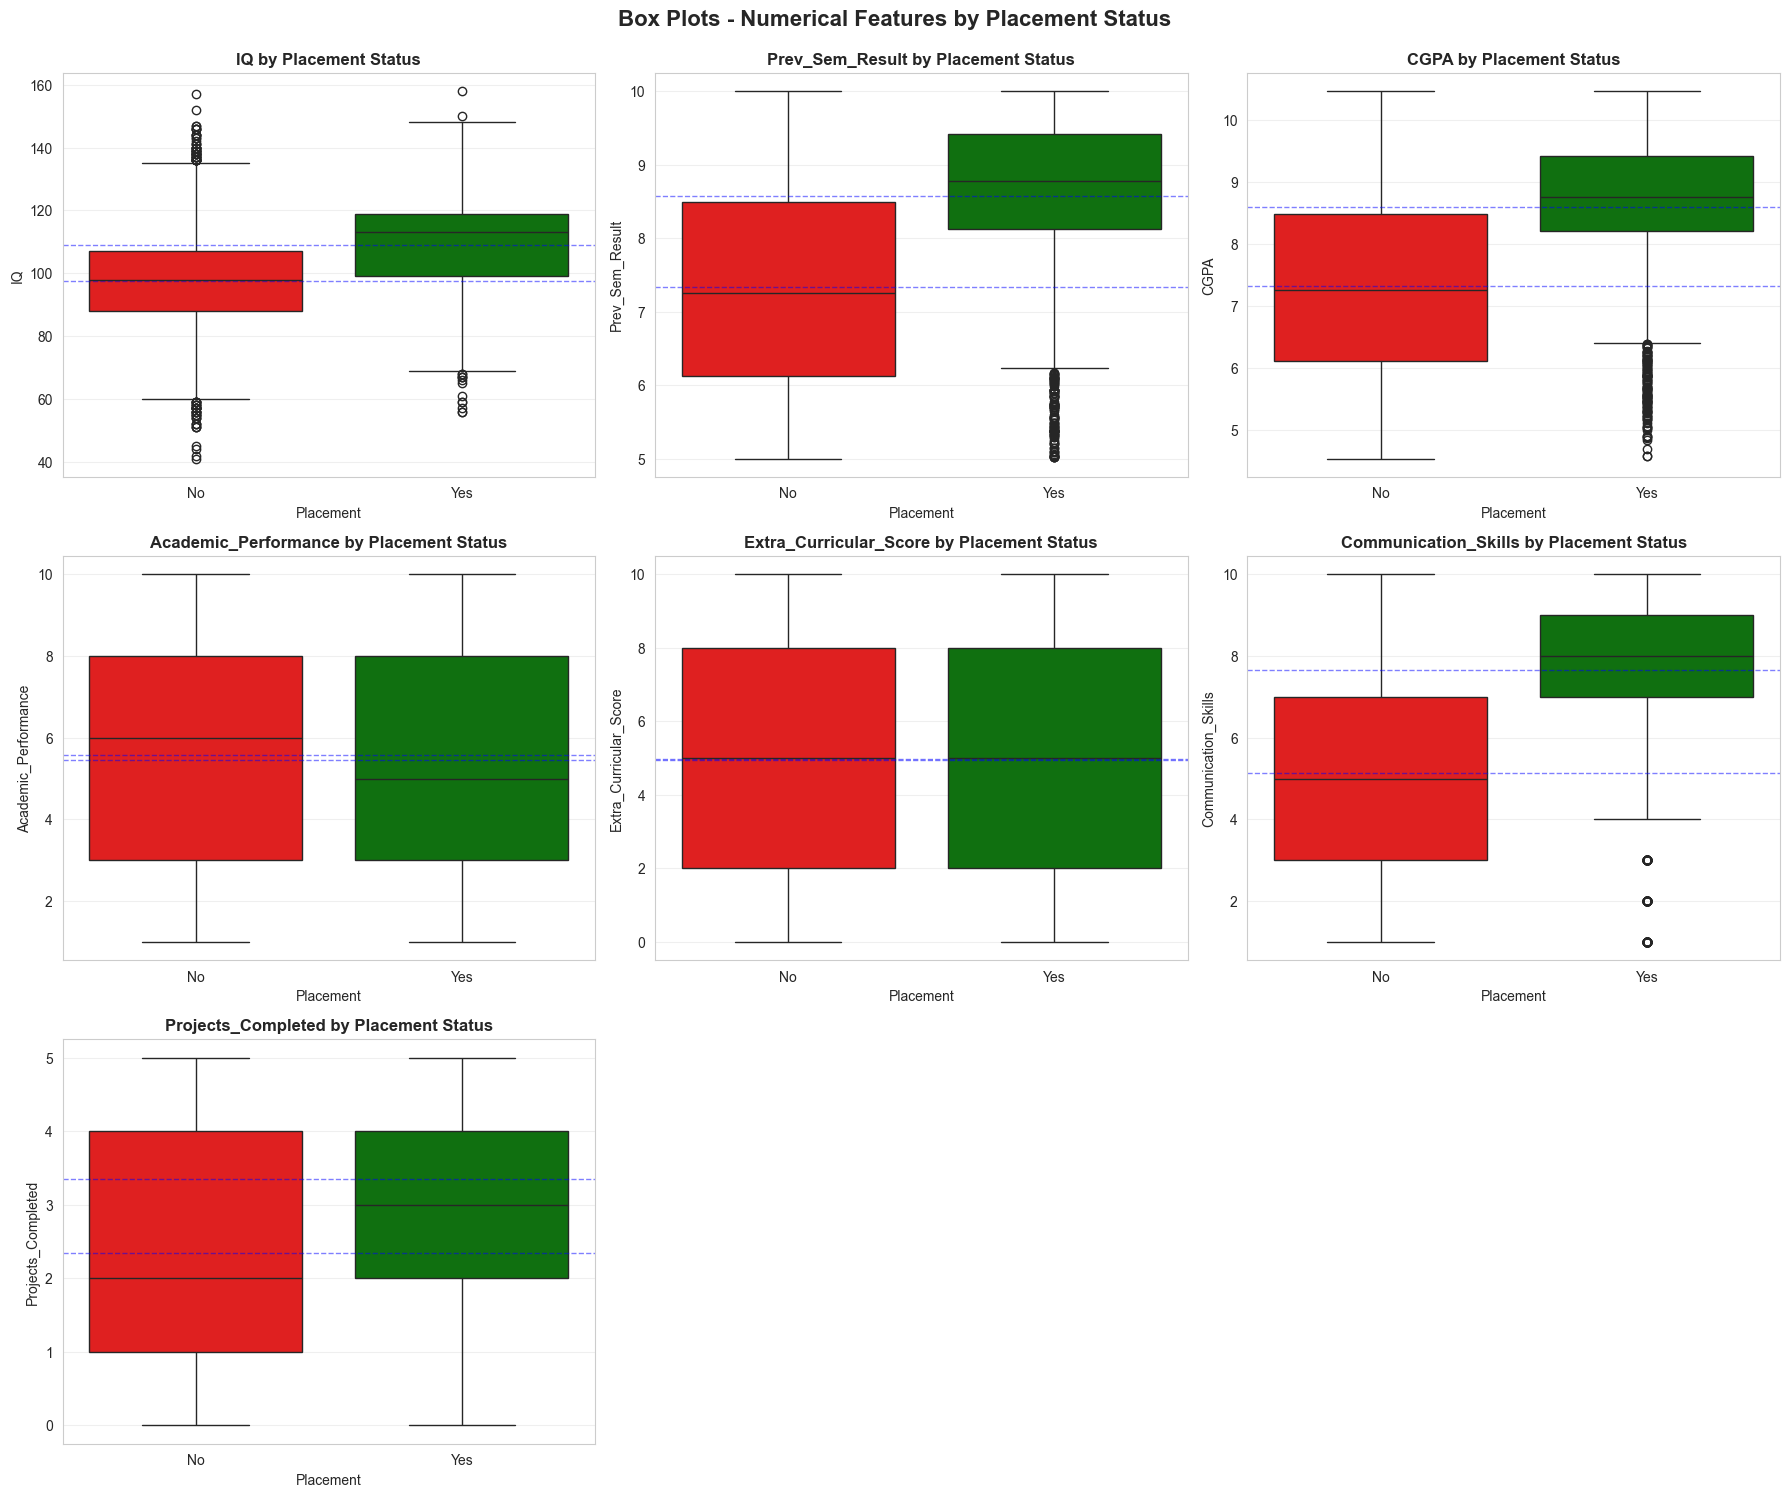

In [27]:
figure, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for index, column in enumerate(numerical_columns):
    sns.boxplot(data=df, x='Placement', y=column, ax=axes[index], 
                palette={'Yes': 'green', 'No': 'red'})
    axes[index].set_title(f'{column} by Placement Status', fontsize=12, fontweight='bold')
    axes[index].set_xlabel('Placement', fontsize=10)
    axes[index].set_ylabel(column, fontsize=10)
    axes[index].grid(True, alpha=0.3, axis='y')
    
    for placement_status in ['Yes', 'No']:
        mean_value = df[df['Placement'] == placement_status][column].mean()
        axes[index].axhline(mean_value, color='blue', linestyle='--', alpha=0.5, linewidth=1)

axes[7].axis('off')
axes[8].axis('off')

plt.suptitle('Box Plots - Numerical Features by Placement Status', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


## 7. Violin Plots - Distribution by Placement Status

Taking a look at how features are distributed for placed vs not placed students. Violin plots combine box plots with density curves to show the full shape of the distributions.


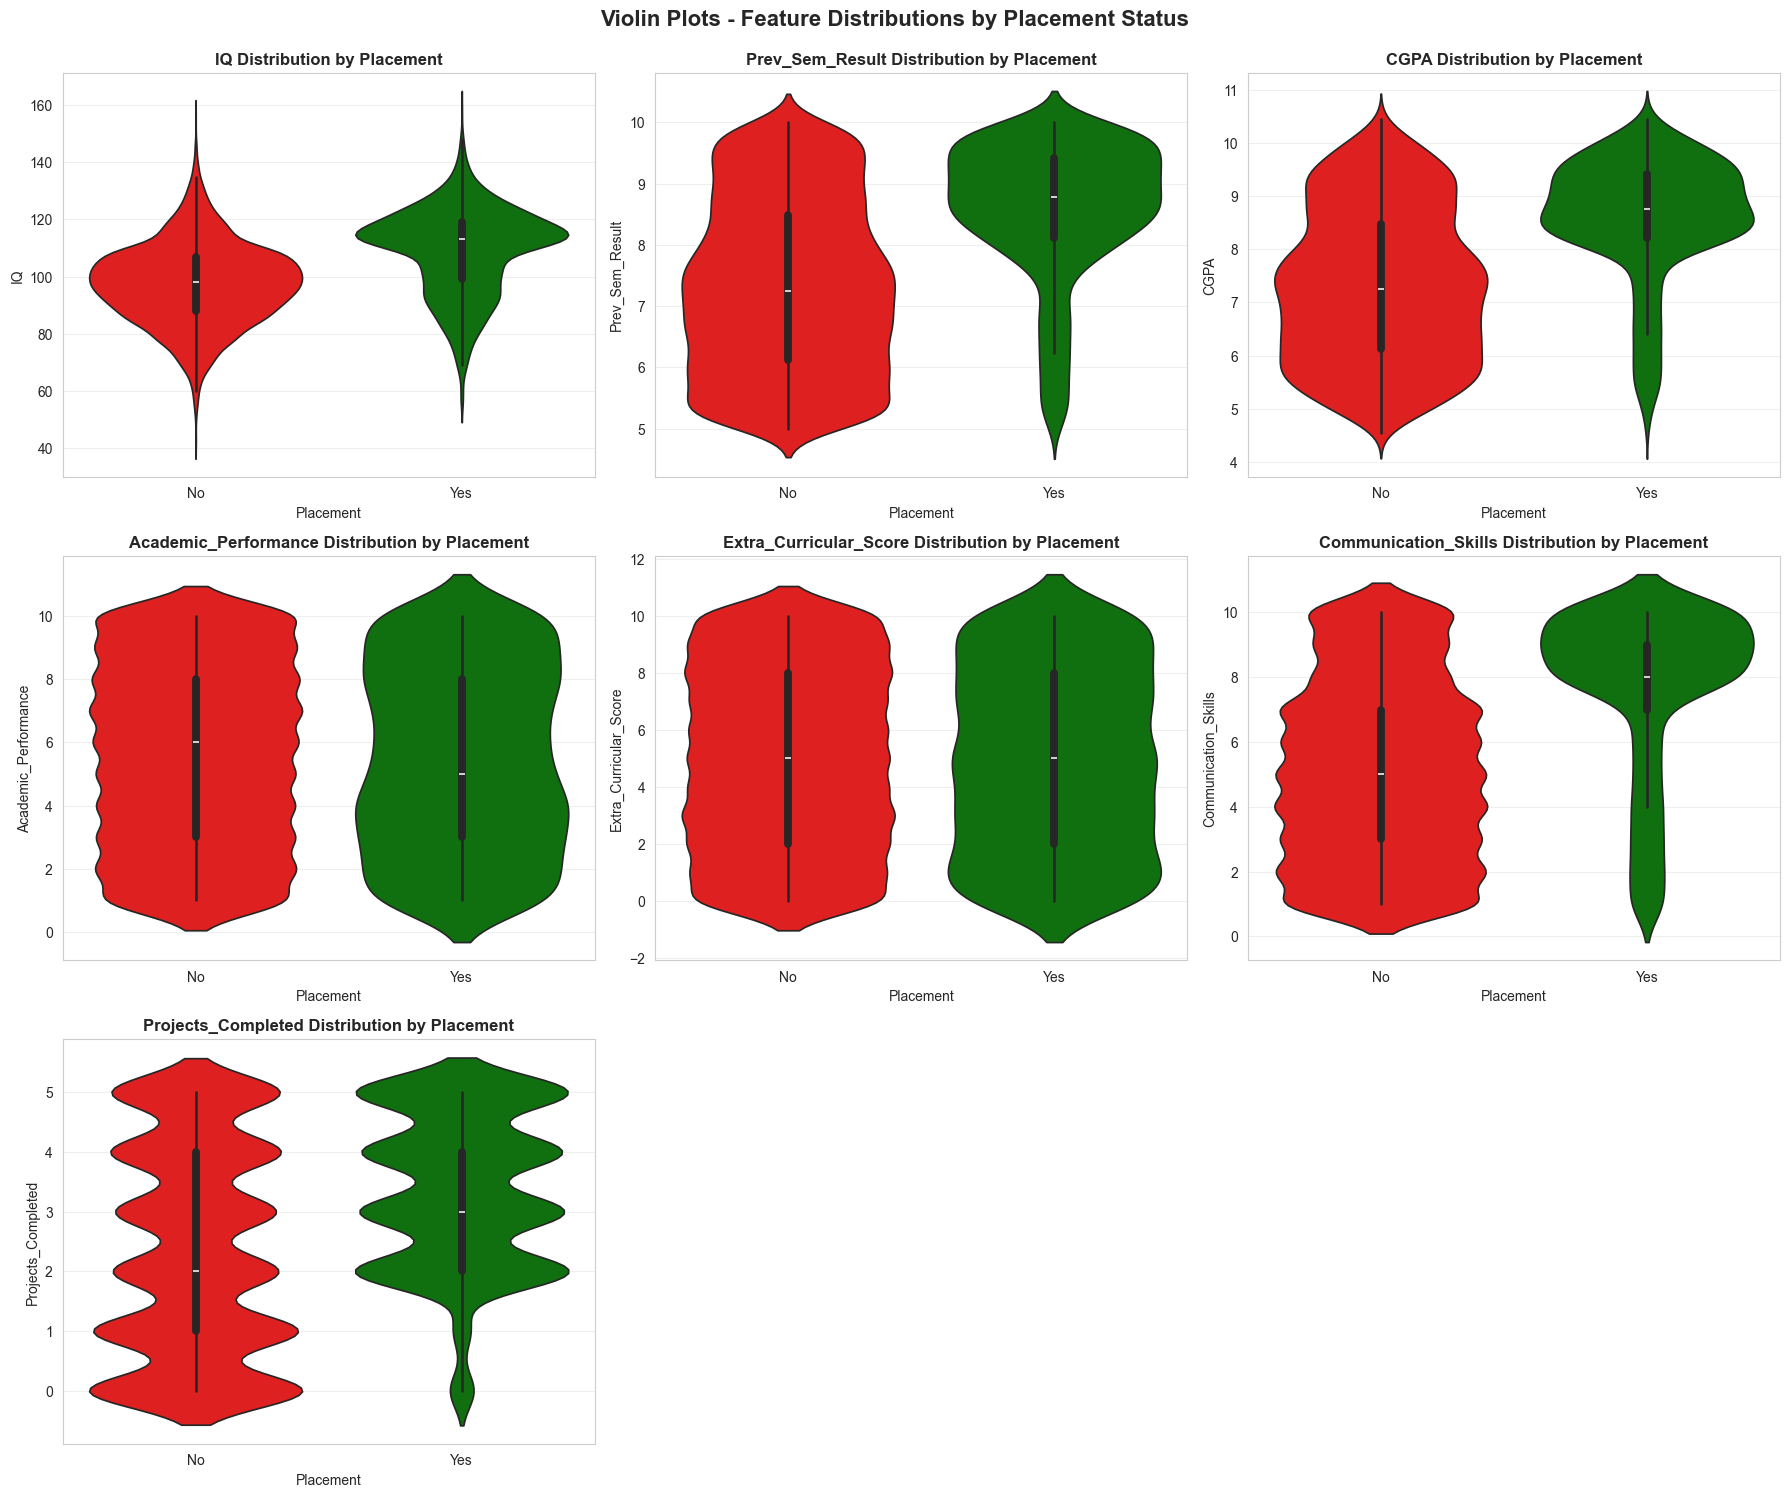

In [28]:
figure, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for index, column in enumerate(numerical_columns):
    sns.violinplot(data=df, x='Placement', y=column, ax=axes[index], 
                   palette={'Yes': 'green', 'No': 'red'}, inner='box')
    axes[index].set_title(f'{column} Distribution by Placement', fontsize=12, fontweight='bold')
    axes[index].set_xlabel('Placement', fontsize=10)
    axes[index].set_ylabel(column, fontsize=10)
    axes[index].grid(True, alpha=0.3, axis='y')

axes[7].axis('off')
axes[8].axis('off')

plt.suptitle('Violin Plots - Feature Distributions by Placement Status', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


## 8. Placement vs Features Analysis

Seeing exactly how placed and not placed students differ across all features. This helps identify which factors matter most for placement success.


In [29]:
placed_students = df[df['Placement'] == 'Yes']
not_placed_students = df[df['Placement'] == 'No']

print("=" * 80)
print("STATISTICAL COMPARISON: PLACED vs NOT PLACED STUDENTS")
print("=" * 80)

comparison = pd.DataFrame({
    'Placed Mean': placed_students[numerical_columns].mean(),
    'Not Placed Mean': not_placed_students[numerical_columns].mean(),
    'Difference': placed_students[numerical_columns].mean() - not_placed_students[numerical_columns].mean(),
    'Placed Median': placed_students[numerical_columns].median(),
    'Not Placed Median': not_placed_students[numerical_columns].median(),
    'Placed Std Dev': placed_students[numerical_columns].std(),
    'Not Placed Std Dev': not_placed_students[numerical_columns].std()
})

print(comparison.round(2))

print("\n" + "=" * 80)
print("PERCENTAGE DIFFERENCE (Placed vs Not Placed)")
print("=" * 80)
percentage_difference = ((placed_students[numerical_columns].mean() - not_placed_students[numerical_columns].mean()) / 
                         not_placed_students[numerical_columns].mean() * 100).round(2)
print(percentage_difference)


STATISTICAL COMPARISON: PLACED vs NOT PLACED STUDENTS
                        Placed Mean  Not Placed Mean  Difference  \
IQ                           109.12            97.55       11.57   
Prev_Sem_Result                8.57             7.33        1.24   
CGPA                           8.59             7.32        1.27   
Academic_Performance           5.45             5.57       -0.12   
Extra_Curricular_Score         4.94             4.98       -0.04   
Communication_Skills           7.66             5.14        2.52   
Projects_Completed             3.35             2.35        1.00   

                        Placed Median  Not Placed Median  Placed Std Dev  \
IQ                             113.00              98.00           15.21   
Prev_Sem_Result                  8.78               7.25            1.13   
CGPA                             8.76               7.26            1.15   
Academic_Performance             5.00               6.00            2.90   
Extra_Curricular_Scor

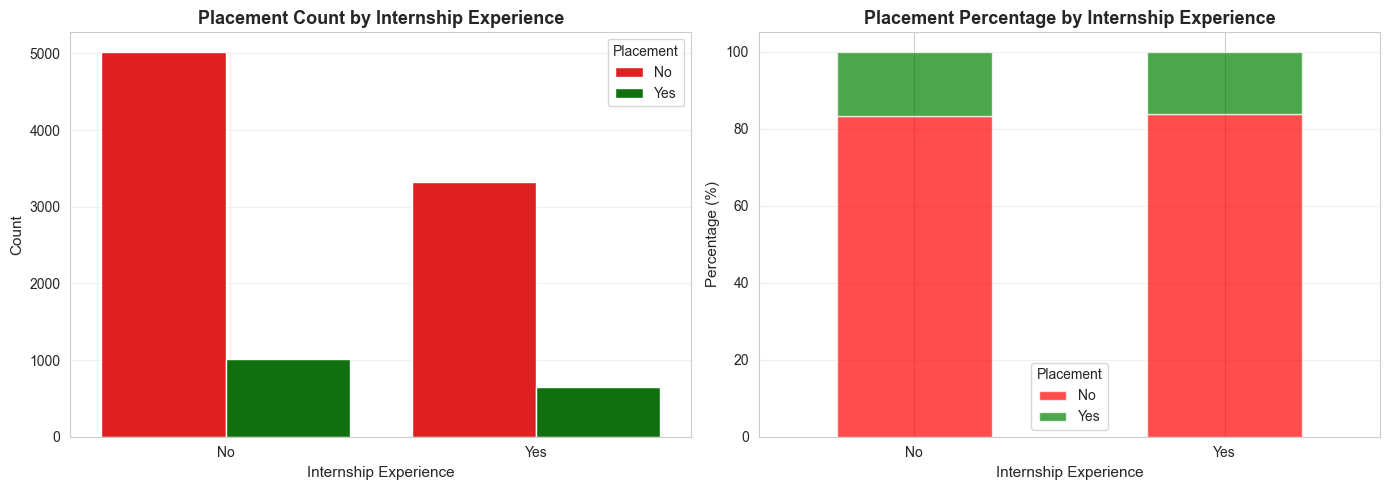

In [30]:
figure, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='Internship_Experience', hue='Placement', 
              ax=axes[0], palette={'Yes': 'green', 'No': 'red'})
axes[0].set_title('Placement Count by Internship Experience', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Internship Experience', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].legend(title='Placement')
axes[0].grid(True, alpha=0.3, axis='y')

placement_percentage = pd.crosstab(df['Internship_Experience'], df['Placement'], normalize='index') * 100
placement_percentage.plot(kind='bar', stacked=True, ax=axes[1], 
                         color=['red', 'green'], alpha=0.7)
axes[1].set_title('Placement Percentage by Internship Experience', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Internship Experience', fontsize=11)
axes[1].set_ylabel('Percentage (%)', fontsize=11)
axes[1].legend(title='Placement', labels=['No', 'Yes'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


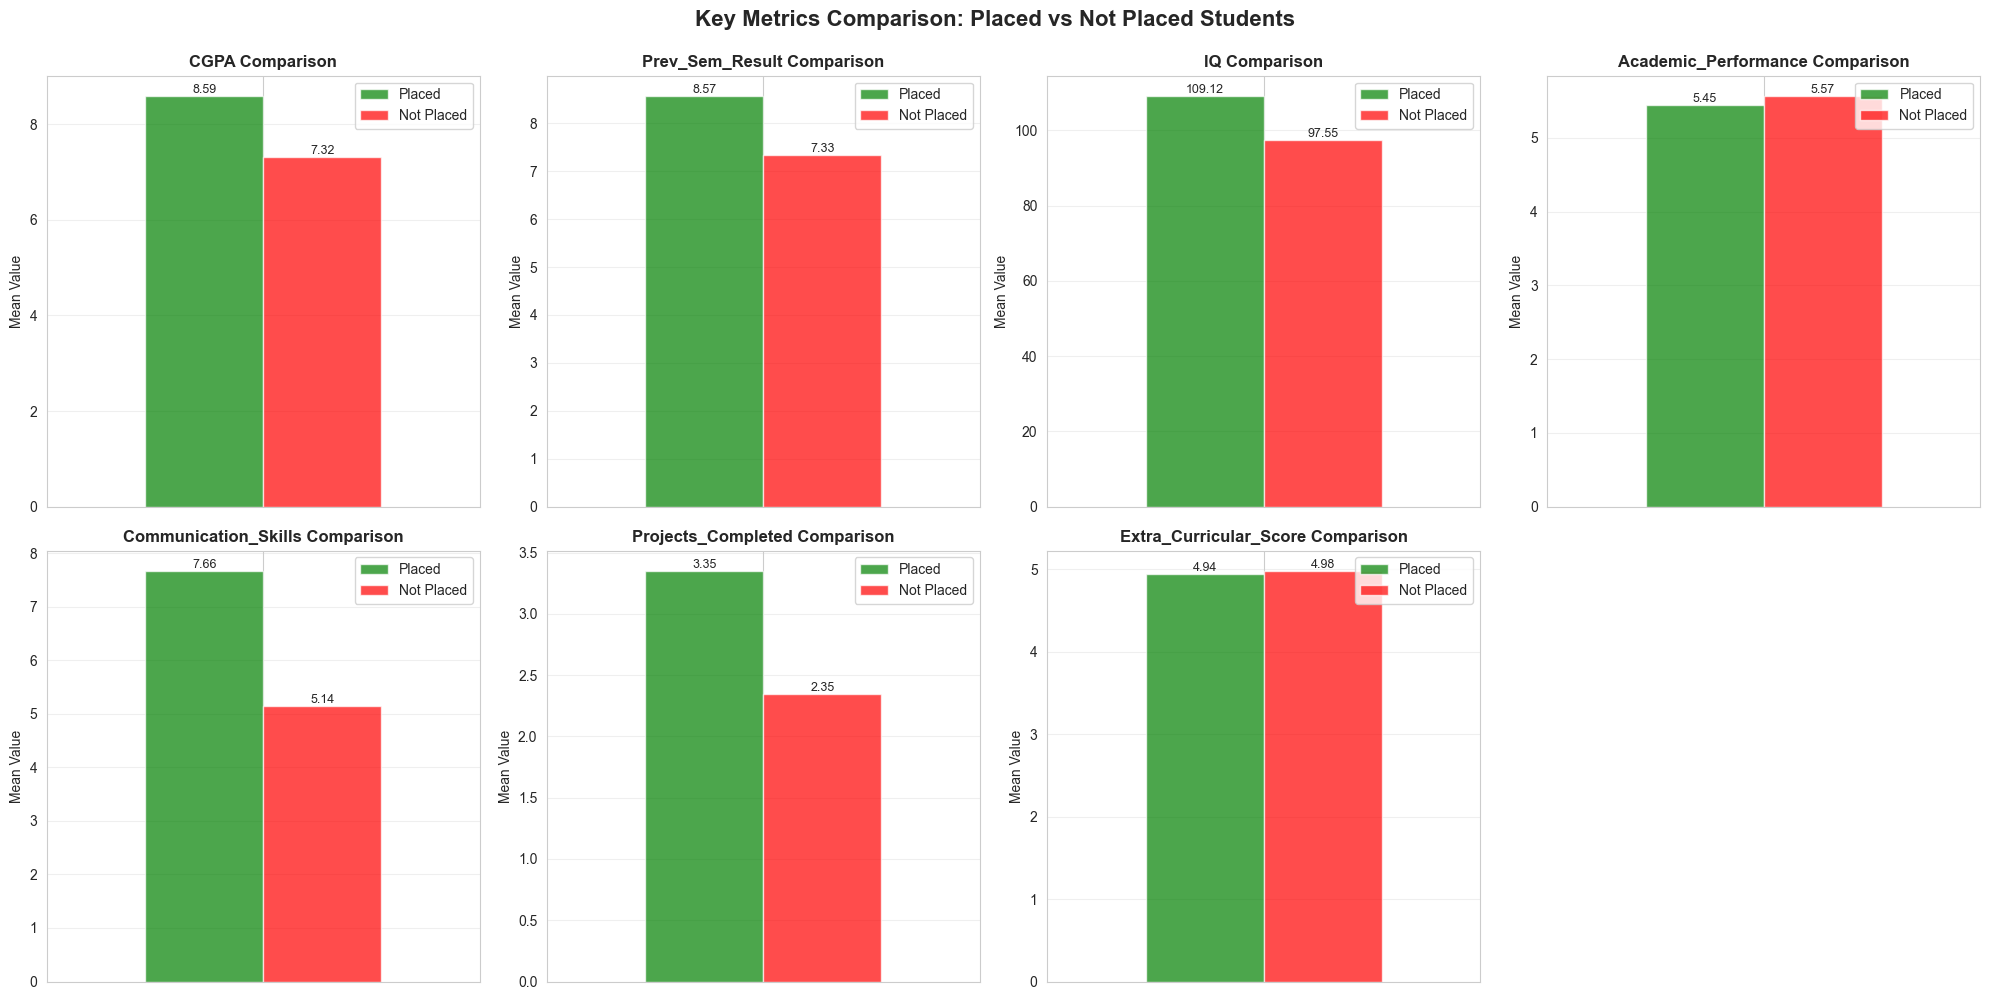

In [31]:
key_metrics = ['CGPA', 'Prev_Sem_Result', 'IQ', 'Academic_Performance', 
               'Communication_Skills', 'Projects_Completed', 'Extra_Curricular_Score']

figure, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for index, metric in enumerate(key_metrics):
    comparison_data = pd.DataFrame({
        'Placed': [placed_students[metric].mean()],
        'Not Placed': [not_placed_students[metric].mean()]
    })
    
    comparison_data.plot(kind='bar', ax=axes[index], color=['green', 'red'], alpha=0.7, width=0.6)
    axes[index].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[index].set_ylabel('Mean Value', fontsize=10)
    axes[index].set_xticklabels([''], rotation=0)
    axes[index].legend()
    axes[index].grid(True, alpha=0.3, axis='y')
    
    for container in axes[index].containers:
        axes[index].bar_label(container, fmt='%.2f', fontsize=9)

axes[7].axis('off')

plt.suptitle('Key Metrics Comparison: Placed vs Not Placed Students', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()
